# Creating outliers for WT02

In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt


if not "../data_processing" in sys.path:
    print("Appended")
    sys.path.append("../data_processing")


import build_dataset


import sys, os
from scipy.stats import skew
from scipy.stats import kurtosis


ROOT_PATH = os.path.abspath("..").split("data_processing")[0]
print("ROOT", ROOT_PATH)
module_path = os.path.abspath(os.path.join(ROOT_PATH+"/utils/"))
if module_path not in sys.path:
    print("appended")
    sys.path.append(module_path)

import functions as f


c, p = f.color_palette()
sns.set(context='paper', style='whitegrid', palette=np.array(p))
print(ROOT_PATH)
plt.style.use('file://' + ROOT_PATH + "/utils/plotparams.rc")
import wt_data
import ff_transform


Appended
ROOT /Users/stianismar/Dropbox/gitProsjekter/master-thesis/src
/Users/stianismar/Dropbox/gitProsjekter/master-thesis/src
ROOT /Users/stianismar/Dropbox/gitProsjekter/master-thesis/src
/Users/stianismar/Dropbox/gitProsjekter/master-thesis/src


In [2]:
# wt_instance = build_dataset.wt_data.load_instance("WTG02",load_minimal=False)
# df = build_dataset.create_rms_datasets_for_one_component(wt_instance, 'GbxHssRr;0,0102;m/s2', 
                                                         power_threshold=2500,plot=False, bins=50, 
                                                         plot_vertical_lines=False)

# build_dataset.save_dataframe_to_csv(df, 'GbxHssRr_RMS_power>2500_WTG02.csv')

IndentationError: unexpected indent (<ipython-input-2-d6d688988144>, line 3)

In [ ]:
# Added this feature in df : RMS_component_interval. This one should represent the RMS value for the interval range specified in the ff_transform file!
# Need to figure out which bins need to be removed (duploicated in the artificial datapoint, since the first ones need to be deleted and replaced with the RMS for the interval)

In [3]:
path = '/Volumes/OsvikExtra/VibrationData/RMS_dataset/GbxHssRr_RMS_power>2500_WTG02.csv'
df = pd.read_csv(path)
df.describe()

,AvgPower,ActPower,AvgRotSpeed,WindSpeed,NacelleDirection,RMS_component_interval,GbxHssRr_RMS_0,GbxHssRr_RMS_1,GbxHssRr_RMS_2,GbxHssRr_RMS_3,...,GbxHssRr_RMS_40,GbxHssRr_RMS_41,GbxHssRr_RMS_42,GbxHssRr_RMS_43,GbxHssRr_RMS_44,GbxHssRr_RMS_45,GbxHssRr_RMS_46,GbxHssRr_RMS_47,GbxHssRr_RMS_48,GbxHssRr_RMS_49
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,...,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,2810.722013,2729.287770,1469.740586,11.248252,194.115734,6.100239,0.457509,0.254320,0.981178,0.360376,...,1.137108,2.089491,1.875750,2.392073,2.823761,2.271125,1.069254,0.632511,0.435221,0.246160
std,273.452548,537.939339,59.670196,2.860017,80.882321,1.652317,0.045476,0.044607,0.295316,0.066903,...,0.139017,0.234858,0.230720,0.412856,0.750731,0.608550,0.263564,0.157723,0.102451,0.051914
min,2500.165283,-37.700001,662.650623,6.600000,0.900000,0.817078,0.249578,0.171429,0.315222,0.275881,...,0.136682,0.239168,0.238460,0.219998,0.280279,0.330837,0.133726,0.086140,0.049666,0.031207
25%,2584.843689,2430.599976,1459.382731,9.400000,130.399994,5.267047,0.423299,0.222723,0.806082,0.344742,...,1.075360,1.987600,1.773638,2.272077,2.306319,1.913431,0.879402,0.516029,0.363250,0.210995
50%,2713.354126,2793.950073,1473.138835,10.400000,162.199997,6.159974,0.458744,0.255291,0.951735,0.355108,...,1.125399,2.120465,1.917171,2.494220,2.860577,2.256783,1.081592,0.623535,0.425135,0.244885
75%,2995.708069,3283.775024,1489.145768,12.500000,262.349991,7.064718,0.494233,0.277727,1.124287,0.365520,...,1.197883,2.221437,2.011429,2.651381,3.440171,2.771768,1.296891,0.759244,0.506057,0.282690
max,3315.529297,3469.699951,1562.194519,25.900000,359.299988,14.584366,0.566679,0.568263,3.365173,1.171859,...,1.598388,2.635439,2.533416,3.186057,4.257551,3.664276,1.716812,1.139778,0.819597,0.372926


## Observation
We see for WT02 that the max RMS value in the gearbox range (10-2000 Hz) is 14.584366. This datapoint is interesting to look at. Maybe filter away this one?

In [4]:
rms = df['RMS_component_interval']
print(f'This is the RMS values for the interval for Gearbox:{ rms }')

This is the RMS values for the interval for Gearbox:0      6.389500
1      5.061433
2      1.857597
3      6.799224
4      6.844513
         ...   
281    6.618701
282    5.376143
283    6.597880
284    8.505770
285    2.710964
Name: RMS_component_interval, Length: 286, dtype: float64


In [5]:
rms.describe()

count    286.000000
mean       6.100239
std        1.652317
min        0.817078
25%        5.267047
50%        6.159974
75%        7.064718
max       14.584366
Name: RMS_component_interval, dtype: float64

In [7]:
# Need to find the RMS bins that span across the frequency interval we want...
SENSOR_NAME = 'GbxHssRr;0,0102;m/s2'
BINS = 50
wt_instance = wt_data.load_instance('WTG02', load_minimal=False)
for interval in wt_instance.ten_second_intervals:
  
    print("Try block")
    try:
        vibration_signal = interval.sensor_df[SENSOR_NAME]
    except:
        continue
    ts = interval.sensor_df['TimeStamp']  # Have this as the y-axis to see how the RMS/frequencies develop
    comp_type = 'gearbox'
    avg_power = interval.op_df["PwrAvg;kW"][0]
    rot_data = interval.high_speed_rot_data

    fast = ff_transform.FastFourierTransform( vibration_signal, ts, comp_type)
    fft, time, centroid, rms, rms_bins, bin_freq = fast.fft_transform_time(rot_data,
                                                                           avg_power,
                                                                           calc_rms_for_bins=True,
                                                                 plot=False,
                                                                 bins=BINS,
                                                                 plot_vertical_lines=False)
    bin_range = bin_freq[1] - bin_freq[0] # Amount of frequencies in each bin
    break



Loading WTG02...
Loaded WTG02
Try block


../data_processing/ff_transform.py:204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  amp = fft_modulus_norm[filter_indexes]


In [10]:
bin_range

255.99902343377465

In [12]:
new_dataset = df.head(10)
new_dataset

,AvgPower,ActPower,AvgRotSpeed,WindSpeed,NacelleDirection,RMS_component_interval,GbxHssRr_RMS_0,GbxHssRr_RMS_1,GbxHssRr_RMS_2,GbxHssRr_RMS_3,...,GbxHssRr_RMS_40,GbxHssRr_RMS_41,GbxHssRr_RMS_42,GbxHssRr_RMS_43,GbxHssRr_RMS_44,GbxHssRr_RMS_45,GbxHssRr_RMS_46,GbxHssRr_RMS_47,GbxHssRr_RMS_48,GbxHssRr_RMS_49
0,2818.207520,3291.300049,1487.871218,14.2,226.699997,6.389500,0.404392,0.258909,0.811581,0.344739,...,1.101426,1.969857,1.778854,2.673142,3.386242,2.750154,1.419267,0.809299,0.444020,0.272188
1,2528.062988,2454.500000,1471.267571,10.6,231.699997,5.061433,0.532580,0.244108,1.221325,0.346431,...,1.106000,2.131452,1.824046,2.082840,2.086788,1.563331,0.788437,0.436628,0.294574,0.181487
2,2500.473145,1772.500000,1432.996560,8.4,284.600006,1.857597,0.478452,0.210531,1.090423,0.360744,...,0.967446,1.962500,1.463750,1.369159,1.247210,1.092017,0.519553,0.320830,0.221710,0.146560
3,2555.221924,2492.899902,1465.589029,9.0,132.000000,6.799224,0.512141,0.226217,1.160659,0.358593,...,1.068143,2.376538,1.979047,2.345064,2.218439,1.995184,0.850978,0.474515,0.348262,0.198423
4,3065.522217,3304.800049,1476.364735,12.7,245.000000,6.844513,0.386640,0.276154,1.027501,0.356752,...,1.155076,1.865711,1.766413,2.519427,3.441490,2.888474,1.341962,0.759380,0.538935,0.295528
5,2579.510986,2786.899902,1469.441078,11.3,301.100006,7.930184,0.407514,0.263802,0.860637,0.369790,...,1.160586,2.201416,1.875874,2.447637,3.014397,2.499477,1.200119,0.711053,0.435755,0.275101
6,2537.796631,2466.000000,1493.188802,10.0,131.500000,4.659376,0.517629,0.247286,0.534208,0.332621,...,1.198744,2.199523,2.190827,2.596931,2.703204,1.916277,1.012641,0.576606,0.344559,0.218208
7,2588.696533,2586.899902,1493.971465,11.1,229.600006,4.860157,0.474903,0.279757,0.536629,0.338635,...,1.338610,2.178644,1.917163,2.785755,3.027529,2.128784,0.977825,0.608689,0.397932,0.234199
8,3300.607666,2901.800049,1463.211760,8.3,92.699997,8.713964,0.426224,0.253064,0.872180,0.371431,...,1.140399,2.190679,1.957966,2.462485,2.796271,2.590859,1.137157,0.600736,0.447692,0.247014
9,2534.070312,2769.000000,1498.249483,9.8,141.899994,4.653982,0.538275,0.251859,0.677084,0.340579,...,1.235603,2.258962,2.083371,2.619901,2.712242,1.875764,0.948645,0.556748,0.351959,0.212861


In [25]:
range_gearbox = 2000

num_bins_overlap = range_gearbox/bin_range
num_bins_overlap = np.ceil(num_bins_overlap)
print(f'Number of overlapping bins {num_bins_overlap}')

print(num_bins_overlap*bin_range)
print(f"Getting an additional {num_bins_overlap * bin_range - range_gearbox} frequencies...")

Number of overlapping bins 8.0
2047.9921874701972
Getting an additional 47.99218747019722 frequencies...


In [26]:
new_dataset = df.head(10)
new_dataset

,AvgPower,ActPower,AvgRotSpeed,WindSpeed,NacelleDirection,RMS_component_interval,GbxHssRr_RMS_0,GbxHssRr_RMS_1,GbxHssRr_RMS_2,GbxHssRr_RMS_3,...,GbxHssRr_RMS_40,GbxHssRr_RMS_41,GbxHssRr_RMS_42,GbxHssRr_RMS_43,GbxHssRr_RMS_44,GbxHssRr_RMS_45,GbxHssRr_RMS_46,GbxHssRr_RMS_47,GbxHssRr_RMS_48,GbxHssRr_RMS_49
0,2818.207520,3291.300049,1487.871218,14.2,226.699997,6.389500,0.404392,0.258909,0.811581,0.344739,...,1.101426,1.969857,1.778854,2.673142,3.386242,2.750154,1.419267,0.809299,0.444020,0.272188
1,2528.062988,2454.500000,1471.267571,10.6,231.699997,5.061433,0.532580,0.244108,1.221325,0.346431,...,1.106000,2.131452,1.824046,2.082840,2.086788,1.563331,0.788437,0.436628,0.294574,0.181487
2,2500.473145,1772.500000,1432.996560,8.4,284.600006,1.857597,0.478452,0.210531,1.090423,0.360744,...,0.967446,1.962500,1.463750,1.369159,1.247210,1.092017,0.519553,0.320830,0.221710,0.146560
3,2555.221924,2492.899902,1465.589029,9.0,132.000000,6.799224,0.512141,0.226217,1.160659,0.358593,...,1.068143,2.376538,1.979047,2.345064,2.218439,1.995184,0.850978,0.474515,0.348262,0.198423
4,3065.522217,3304.800049,1476.364735,12.7,245.000000,6.844513,0.386640,0.276154,1.027501,0.356752,...,1.155076,1.865711,1.766413,2.519427,3.441490,2.888474,1.341962,0.759380,0.538935,0.295528
5,2579.510986,2786.899902,1469.441078,11.3,301.100006,7.930184,0.407514,0.263802,0.860637,0.369790,...,1.160586,2.201416,1.875874,2.447637,3.014397,2.499477,1.200119,0.711053,0.435755,0.275101
6,2537.796631,2466.000000,1493.188802,10.0,131.500000,4.659376,0.517629,0.247286,0.534208,0.332621,...,1.198744,2.199523,2.190827,2.596931,2.703204,1.916277,1.012641,0.576606,0.344559,0.218208
7,2588.696533,2586.899902,1493.971465,11.1,229.600006,4.860157,0.474903,0.279757,0.536629,0.338635,...,1.338610,2.178644,1.917163,2.785755,3.027529,2.128784,0.977825,0.608689,0.397932,0.234199
8,3300.607666,2901.800049,1463.211760,8.3,92.699997,8.713964,0.426224,0.253064,0.872180,0.371431,...,1.140399,2.190679,1.957966,2.462485,2.796271,2.590859,1.137157,0.600736,0.447692,0.247014
9,2534.070312,2769.000000,1498.249483,9.8,141.899994,4.653982,0.538275,0.251859,0.677084,0.340579,...,1.235603,2.258962,2.083371,2.619901,2.712242,1.875764,0.948645,0.556748,0.351959,0.212861


In [31]:
colum_names = new_dataset.columns.values.tolist()
filtered_columns = [x for x in colum_names if '_RMS_' in x]

filtered_columns = filtered_columns[:8]

In [68]:
total_rms_array = np.zeros(8)
len(total_rms_array)

8

[0.4575085658647248, 0.25432022779923524, 0.9811780338571955, 0.36037587062950255, 1.2320116356980033, 5.780001966871786, 0.29392115634509436, 0.4155873612022603]


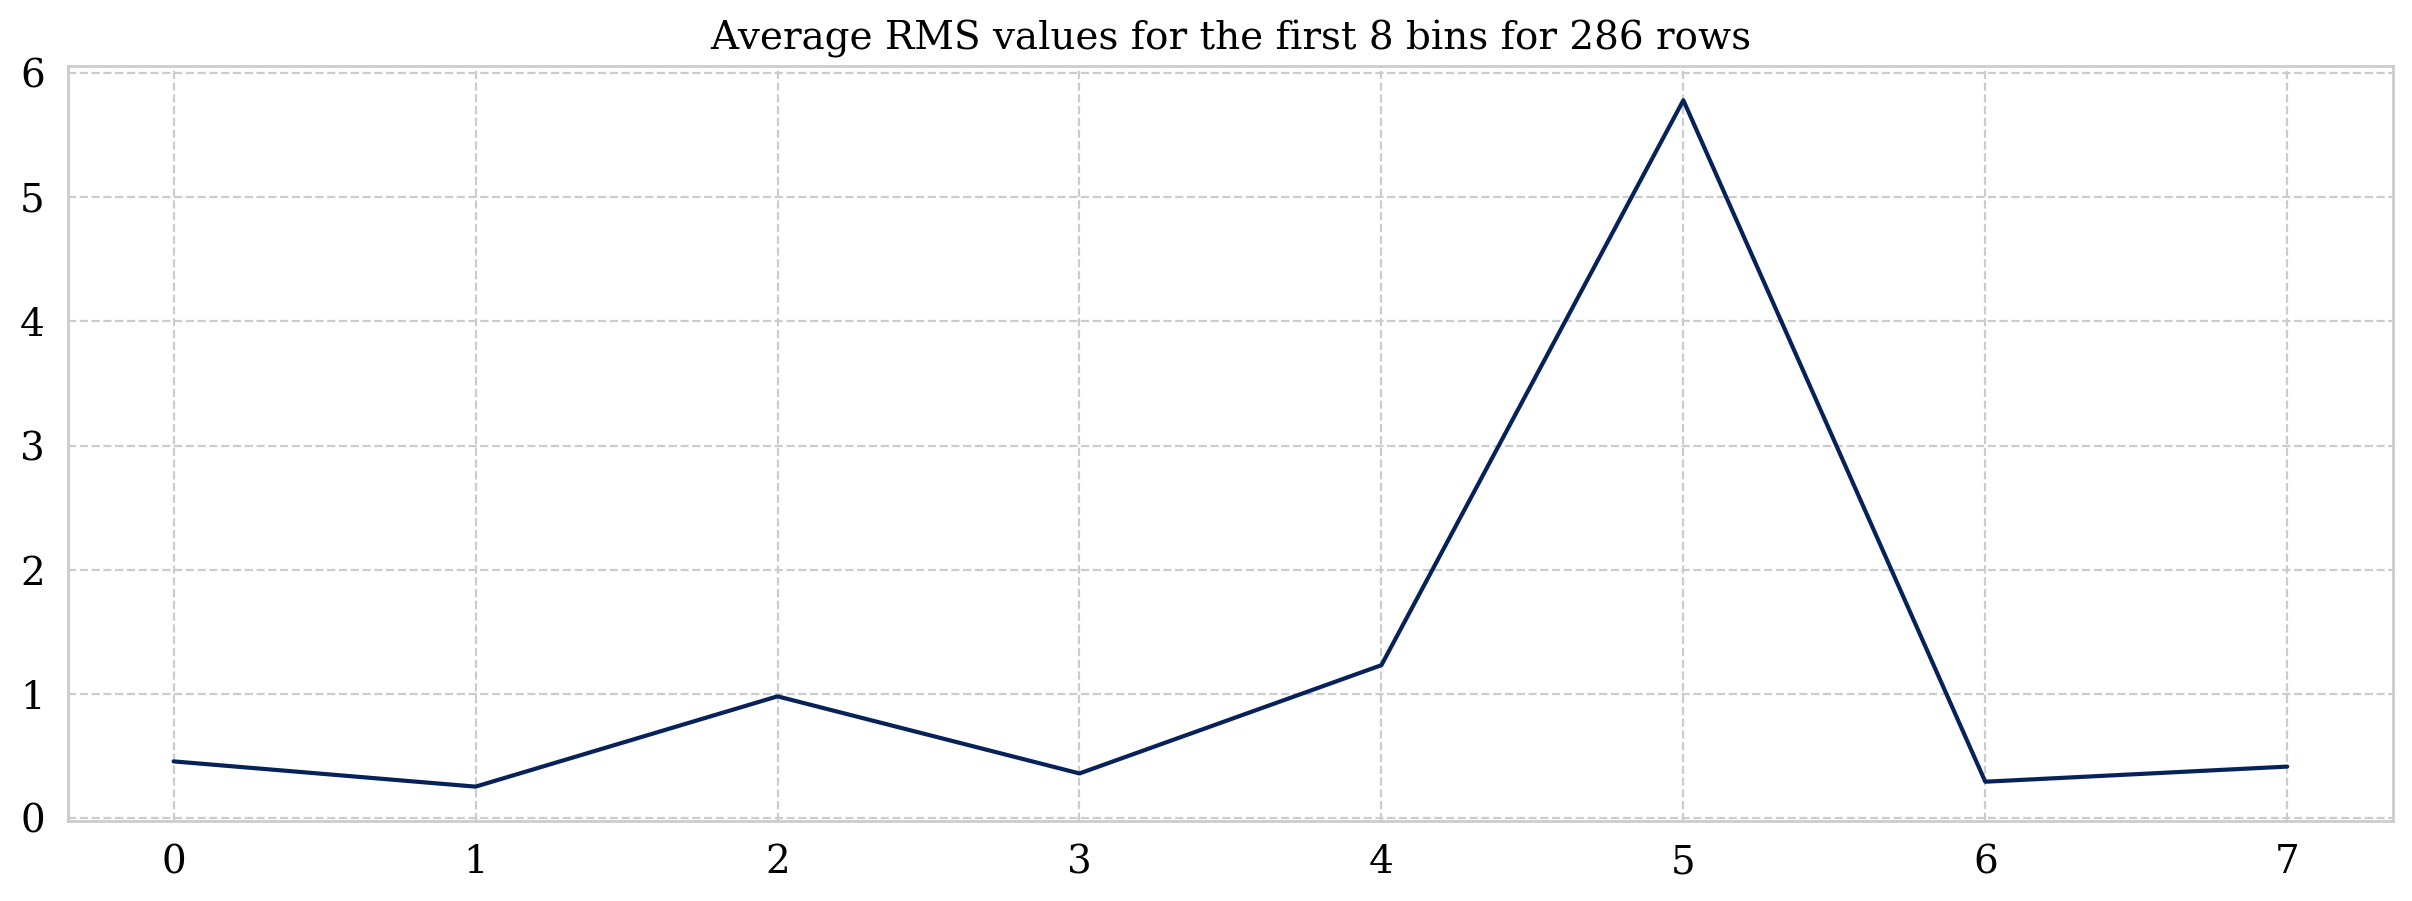

In [79]:
from IPython.display import Markdown as md

import matplotlib.pyplot as plt
# Find the sum of the 8 first RMS vals:
total_rms_array = np.zeros(8)
for index, row in df.iterrows():
    
    
    rms_array = []
    for col in filtered_columns:
        rms_array.append(row[col])    
    total_rms_array = [x + y for x, y in zip(total_rms_array,rms_array)]


avg_array = [x/len(df) for x in total_rms_array] 
fig = plt.figure(figsize=(15,5))    
plt.plot(avg_array)
plt.title(f"Average RMS values for the first 8 bins for {df.shape[0]} rows")
plt.show

print(avg_array)

## The plan 
The plan here is to update the first 8 RMS bin values based on the average seen above, and keep the remaining {{BINS-num_bins_overlap}}


In [ ]:
# Iterater over the rows in the new dataset
# For each column in 

In [33]:
for name in enumerate(filtered_columns):
    new_dataset[name] = new_dataset[name]*2
# make new df and copy rows )new for the ones above ,...
new_dataset

KeyError: (0, 'GbxHssRr_RMS_0')